In [14]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging

In [15]:
driver = webdriver.Chrome(ChromeDriverManager().install())

In [16]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

In [17]:
# Find books
book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

In [18]:
book_categories[0].text

'Category:Baptism of Fire characters'

In [19]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [20]:
driver.get(book_categories[0].get_attribute('href'))

In [21]:
 character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')

In [22]:
character_elems[0].text

'Adalia'

In [23]:
### Full Code

In [24]:
# Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Silent download of drivers
logging.getLogger('WDM').setLevel(logging.NOTSET)
os.environ['WDM_LOG'] = 'False'

# Use ChromeDriverManager to get the executable path
chrome_driver_path = ChromeDriverManager().install()

# Create driver
driver = webdriver.Chrome(executable_path=chrome_driver_path, options=chrome_options)

# Go to the characters in books page
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

# Find books
book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})


In [26]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [ ]:
pd.DataFrame(character_list)

In [27]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

character_list = []

for book in books:
    try:
        # go to book page with an increased timeout
        driver.get(book['url'])
        WebDriverWait(driver, 60).until(EC.presence_of_element_located((By.XPATH, '//a[@class="category-page__member-link"]')))
    except TimeoutException:
        print(f"Timed out while loading page for book: {book['book_name']}")
        continue

    # Retrieve all character elements
    character_elems = driver.find_elements(by=By.XPATH, value='//a[@class="category-page__member-link"]')
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'], 'character': elem.text})


Timed out while loading page for book: Godamba Thaess'en
Timed out while loading page for book: Category:Something Ends, Something Begins characters


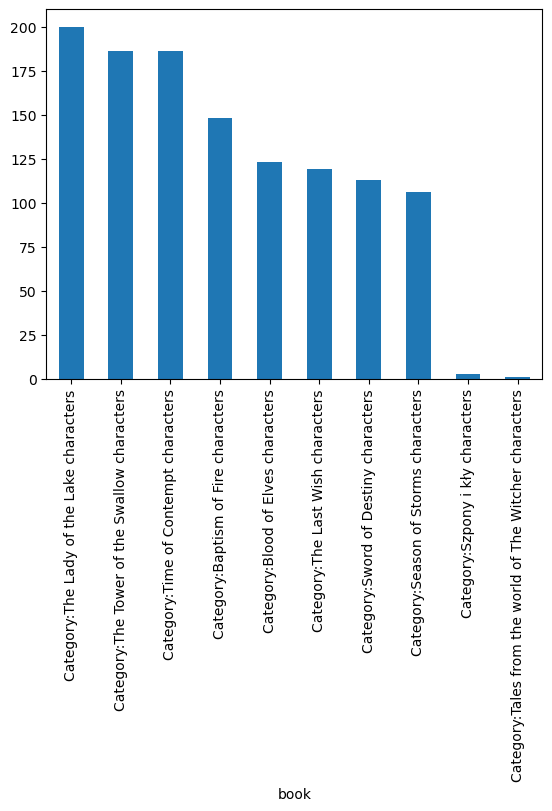

In [28]:
#Number of charecters per book

character_df = pd.DataFrame(character_list)

character_df['book'].value_counts().plot(kind="bar")
plt.show()